In [1]:
from financeiro import FinancialSignal, AIFinancial, FinancialData
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fi = FinancialData()
indexes = ["IFNC", "BDRX", "IMAT", "IEE", "IMOB"]
data = fi.get_data_by_indexes(indexes)

Número total de ativos: 120
INDEX: IFNC	 ATIVOS: 20
INDEX: BDRX	 ATIVOS: 54
INDEX: IMAT	 ATIVOS: 10
INDEX: IEE	 ATIVOS: 18
INDEX: IMOB	 ATIVOS: 18


In [3]:
train_date = ('2017-10-28', '2019-10-28')
test_date = ('2019-10-28', '2020-10-28')
train, test, volumes = fi.get_data_train_and_test(data, train_date, test_date)

  0%|          | 0/20 [00:00<?, ?it/s]

FUNDO: IFNC


  0%|          | 0/54 [00:00<?, ?it/s]

FUNDO: BDRX


  0%|          | 0/10 [00:00<?, ?it/s]

FUNDO: IMAT


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IEE


  0%|          | 0/18 [00:00<?, ?it/s]

FUNDO: IMOB


100%|██████████| 18/18 [00:38<00:00,  2.12s/it]


In [4]:
list_v = {}
for df in train.keys():
    a = volumes[df].mean().sort_values(ascending=False)[:10]
    list_v[df] = a.keys()
    
for key in train.keys():
    train[key] = train[key][list_v[key]]

In [5]:
train["IMAT"].describe()

,VALE3.SA,USIM5.SA,GOAU4.SA,GGBR4.SA,CSNA3.SA,SUZB3.SA,KLBN11.SA,BRAP4.SA,BRKM5.SA,DTEX3.SA
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,44.532810,9.005798,6.718537,14.309315,10.022227,35.356391,16.694876,29.278261,41.772304,10.254148
std,5.950705,1.149953,0.756470,1.566357,3.435729,9.405006,1.516215,2.996786,6.956627,1.562375
min,28.543030,6.819429,4.323398,9.479700,6.024615,17.031906,13.909518,19.559958,25.404394,7.253834
25%,41.042706,8.134605,6.295769,13.459140,7.393405,30.762500,15.497757,28.164711,38.173582,8.973842
50%,45.464016,8.821419,6.901825,14.705152,8.497528,36.362001,16.340961,29.605930,42.051664,10.032158
75%,48.496438,9.760294,7.266086,15.380362,13.523422,43.213482,17.843902,31.237845,46.990047,11.615963
max,58.162998,12.366889,8.064862,17.469555,17.806318,53.250553,20.415396,36.089314,55.835045,13.338112


In [6]:
dfs = []
for key in train.keys():
    dfs.append(train[key])

result = pd.concat(dfs)

  0%|          | 0/5 [00:00<?, ?it/s]

Segmentacao de dados antes: 
Segmentacao de dados antes: 


 20%|██        | 1/5 [00:01<00:06,  1.60s/it]

Ativos com Melhor Relação em Cada Cluster: ['IRBR3.SA', 'B3SA3.SA']
['IRBR3.SA', 'B3SA3.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 40%|████      | 2/5 [00:03<00:04,  1.65s/it]

Ativos com Melhor Relação em Cada Cluster: ['WALM34.SA', 'AAPL34.SA']
['WALM34.SA', 'AAPL34.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 60%|██████    | 3/5 [00:04<00:03,  1.56s/it]

Ativos com Melhor Relação em Cada Cluster: ['VALE3.SA']
['VALE3.SA']
Segmentacao de dados antes: 
Segmentacao de dados antes: 


 80%|████████  | 4/5 [00:06<00:01,  1.51s/it]

Ativos com Melhor Relação em Cada Cluster: ['TRPL4.SA', 'CMIG4.SA', 'TAEE11.SA', 'CESP6.SA', 'EGIE3.SA']
['TRPL4.SA', 'CMIG4.SA', 'TAEE11.SA', 'CESP6.SA', 'EGIE3.SA']
Segmentacao de dados antes: 


/home/victorhdcoelho/Documentos/UNB/SinaisFinanceiros/PersonalProjects/atividade1-SinaisDigitais/financeiro.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(40, 10))


Segmentacao de dados antes: 


100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

Ativos com Melhor Relação em Cada Cluster: ['TEND3.SA']
['TEND3.SA']


[('IFNC', ('IRBR3.SA', -0.02957533417474176)),
 ('BDRX', ('AAPL34.SA', -0.11054961887482566)),
 ('IMAT', ('VALE3.SA', -0.10095069915817778)),
 ('IEE', ('CESP6.SA', -0.08517148093961788)),
 ('IMOB', ('TEND3.SA', -0.031196843874786415))]

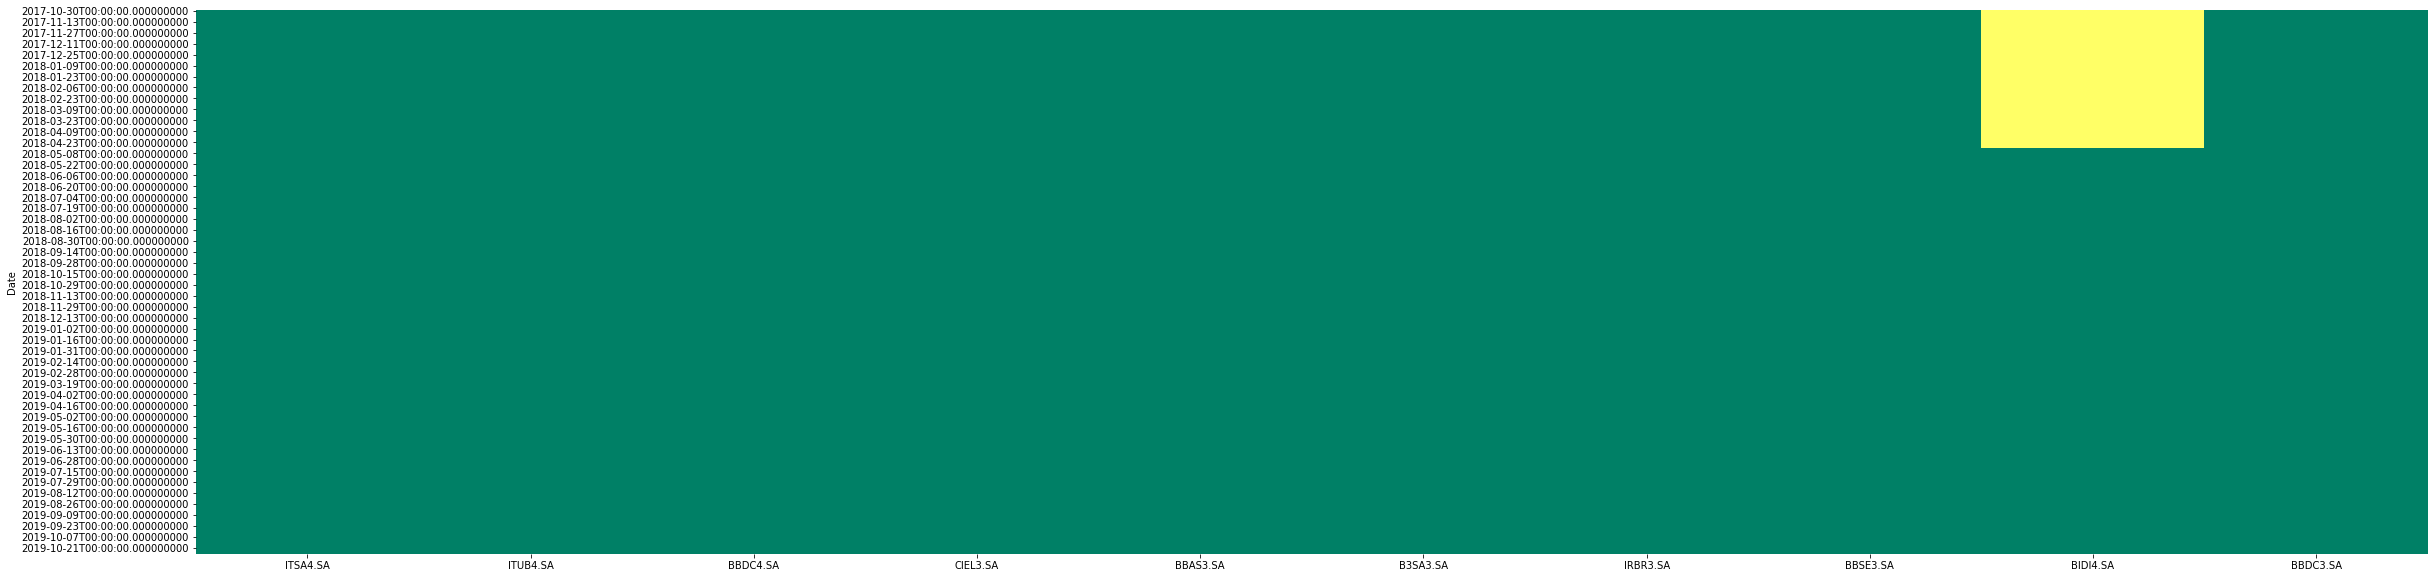

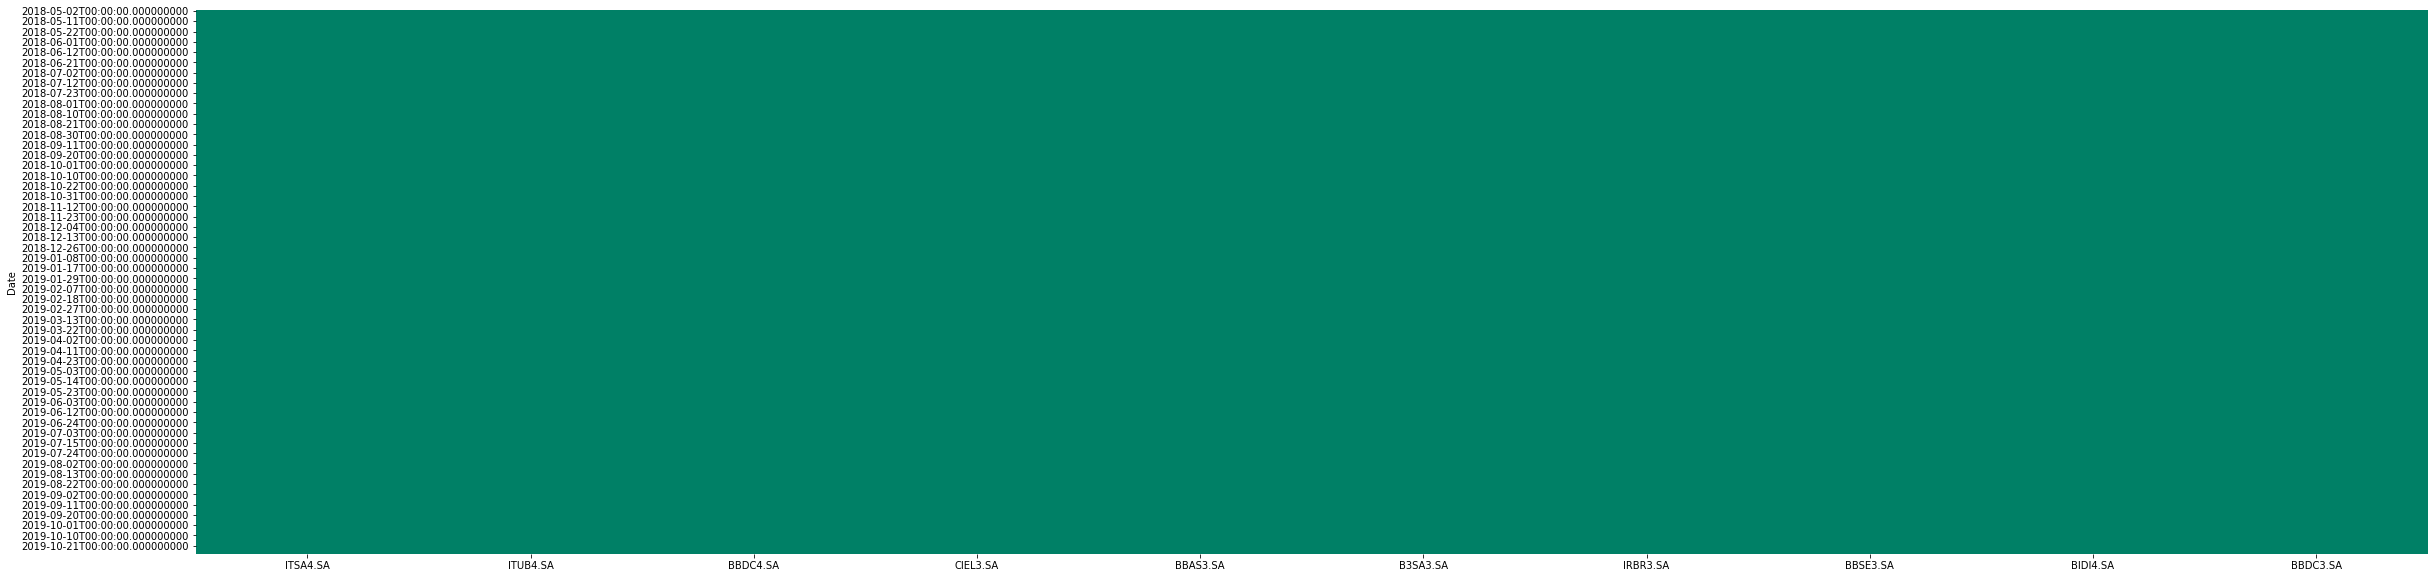

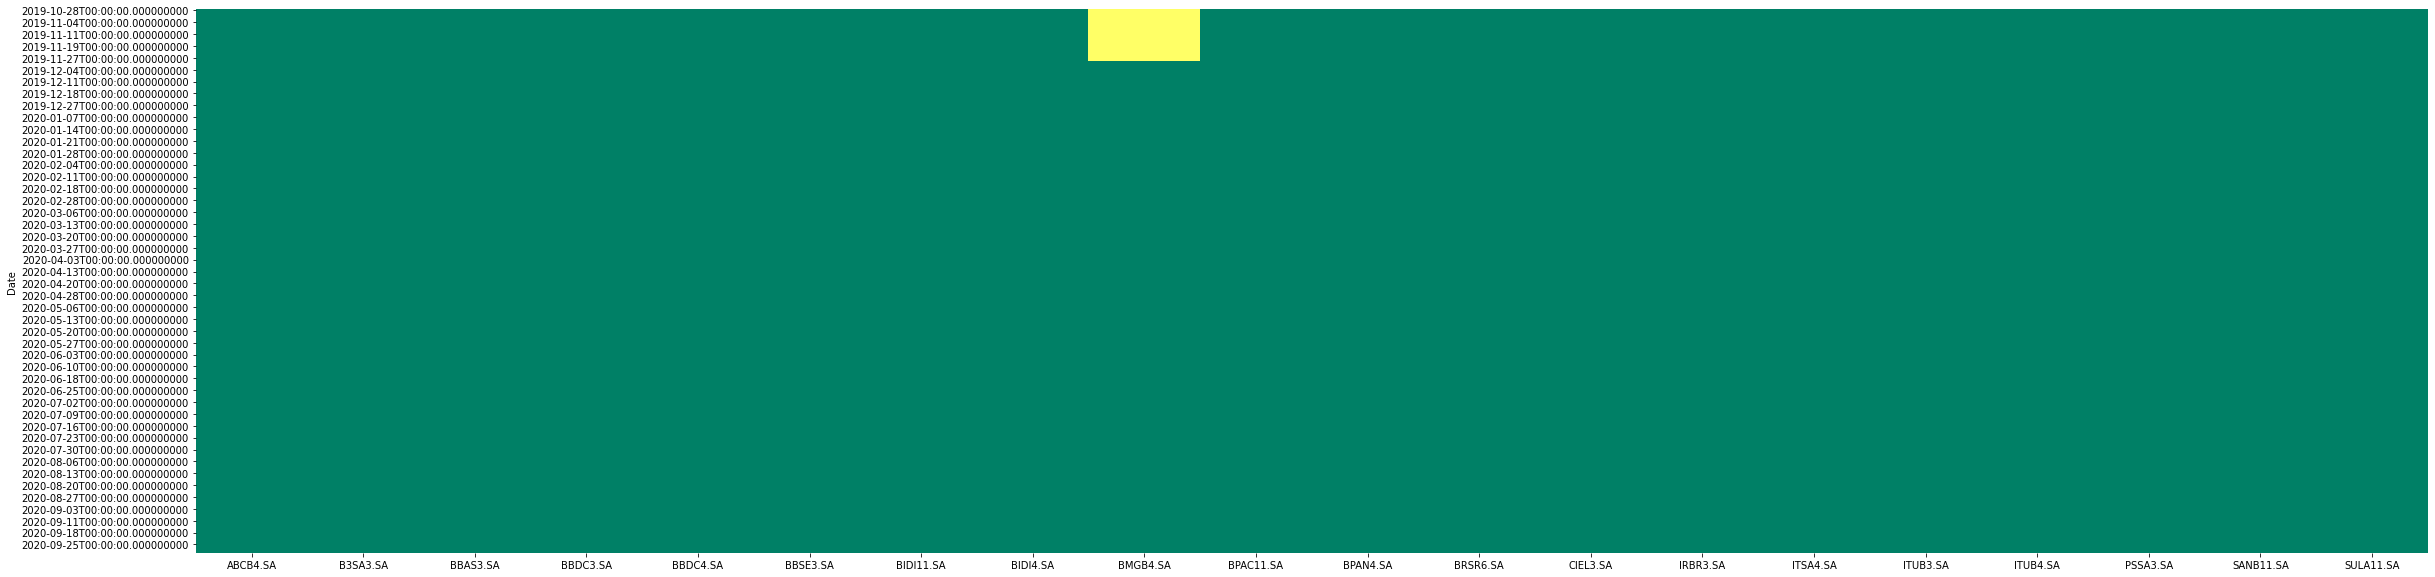

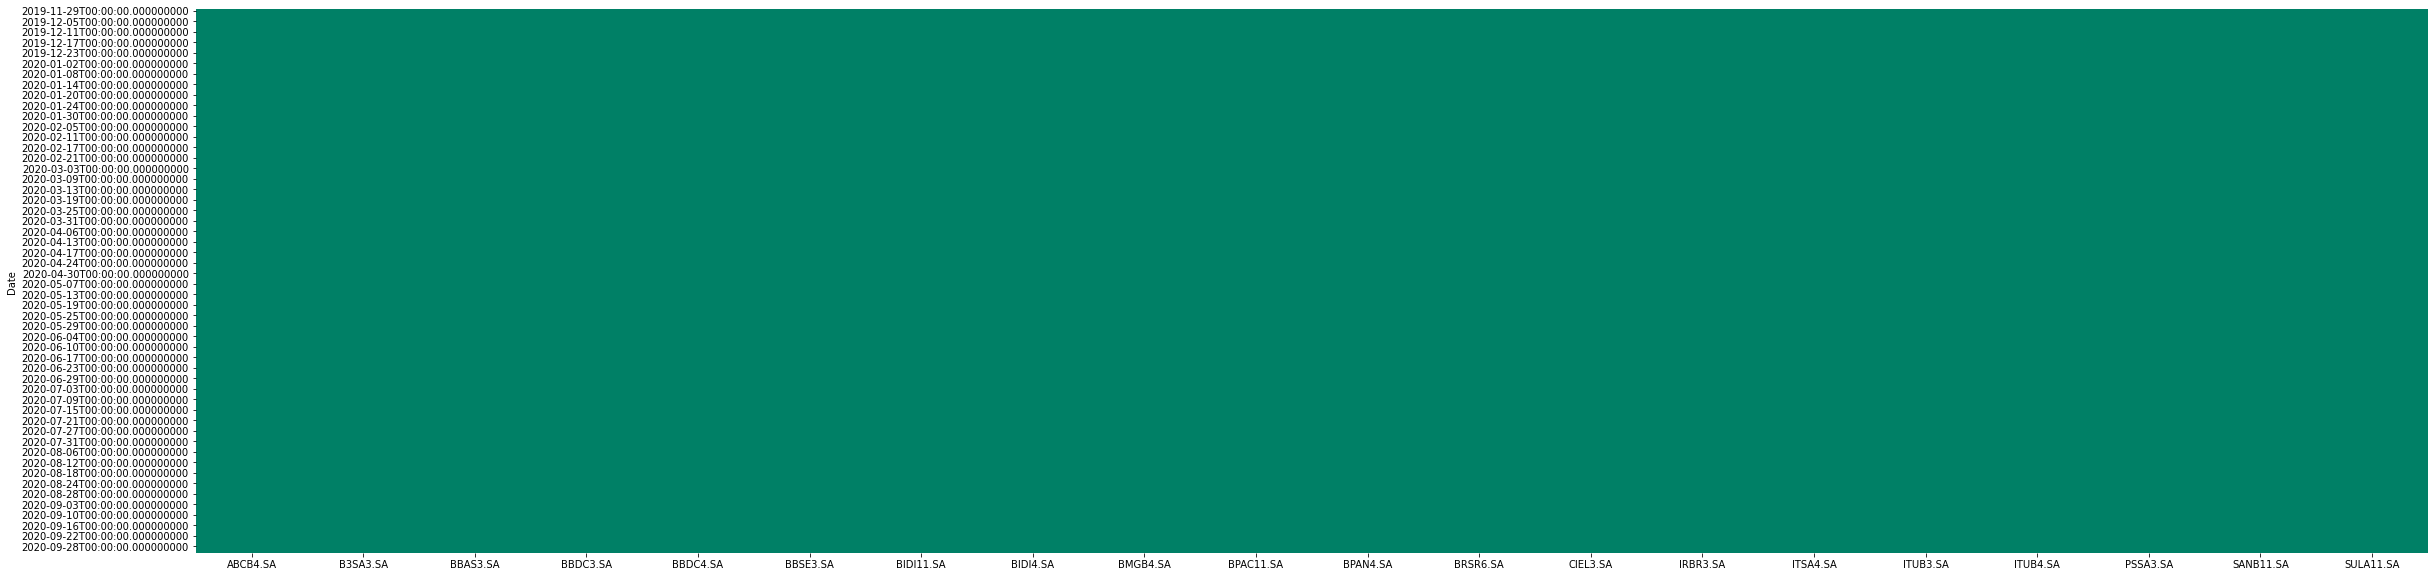

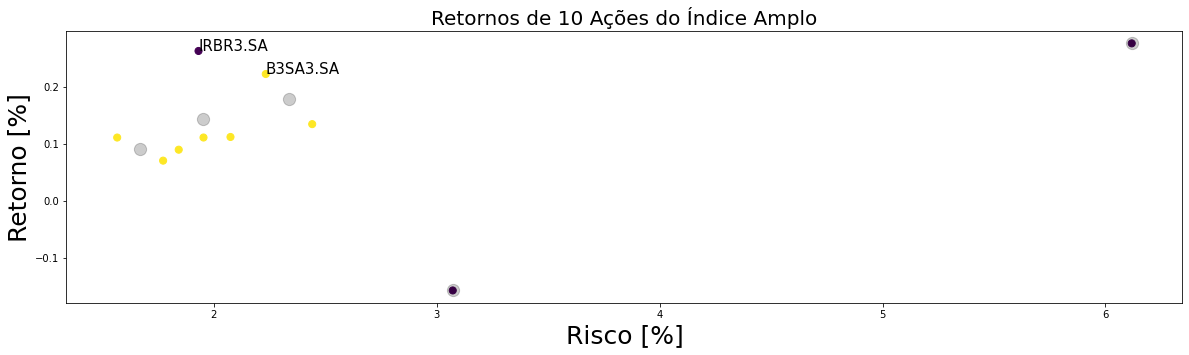

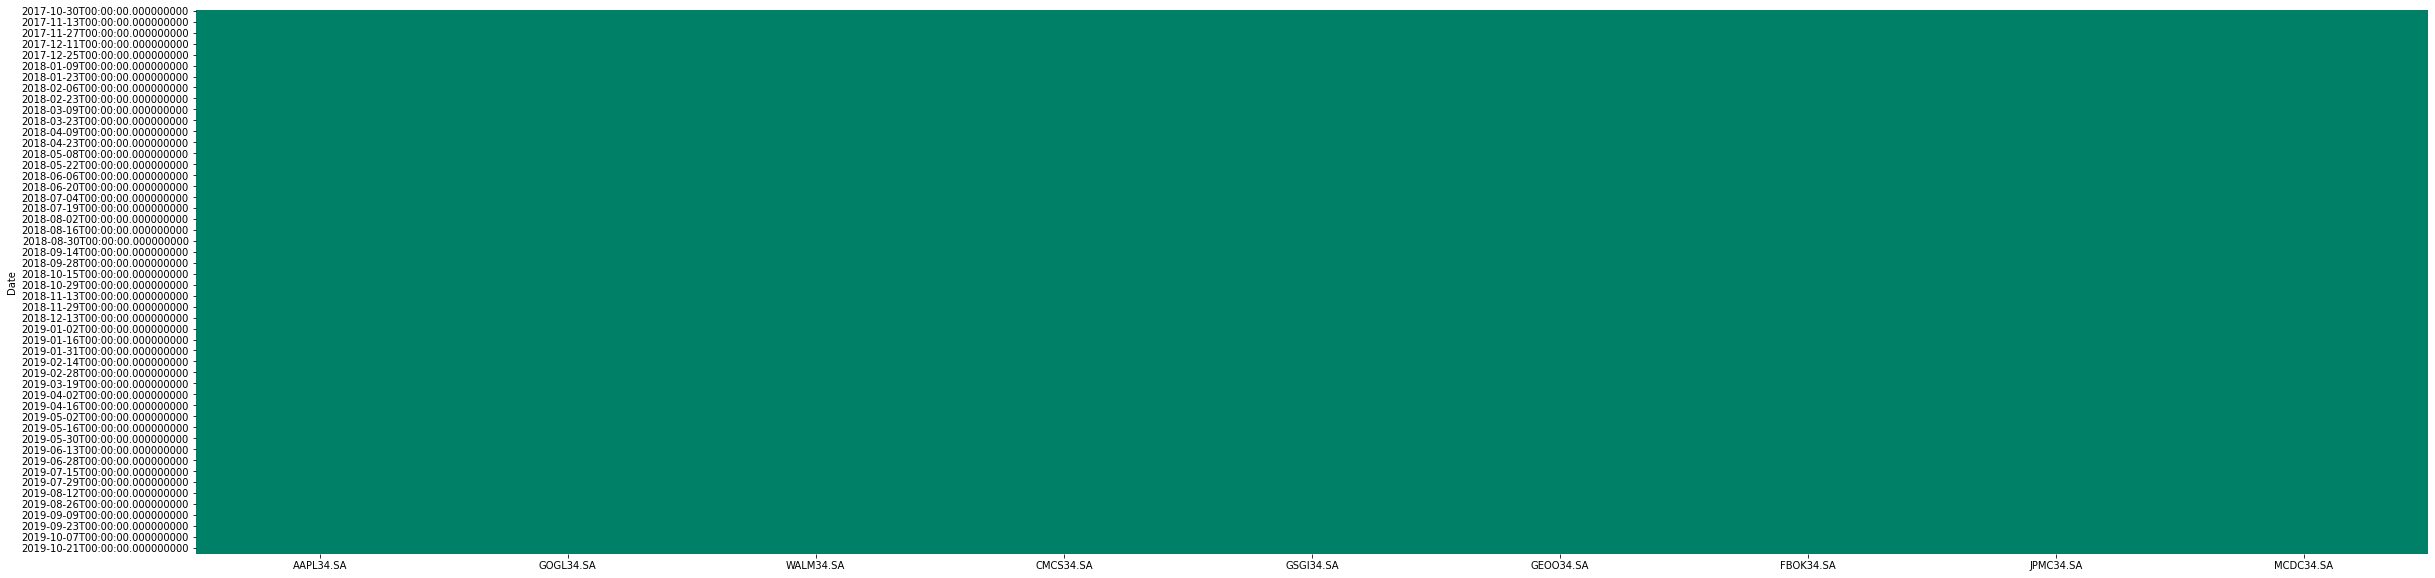

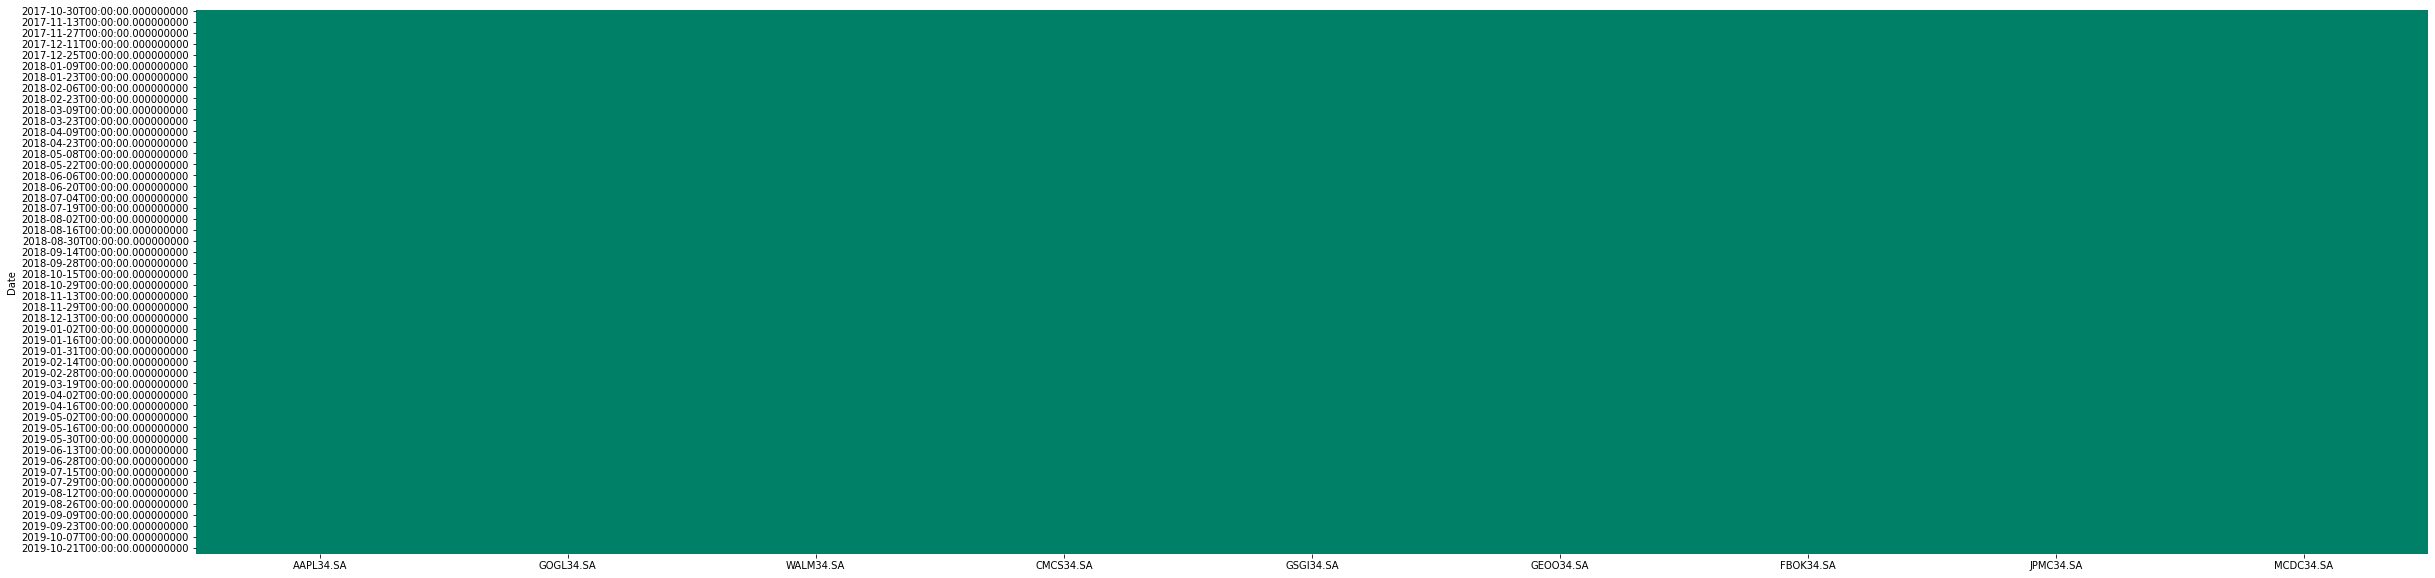

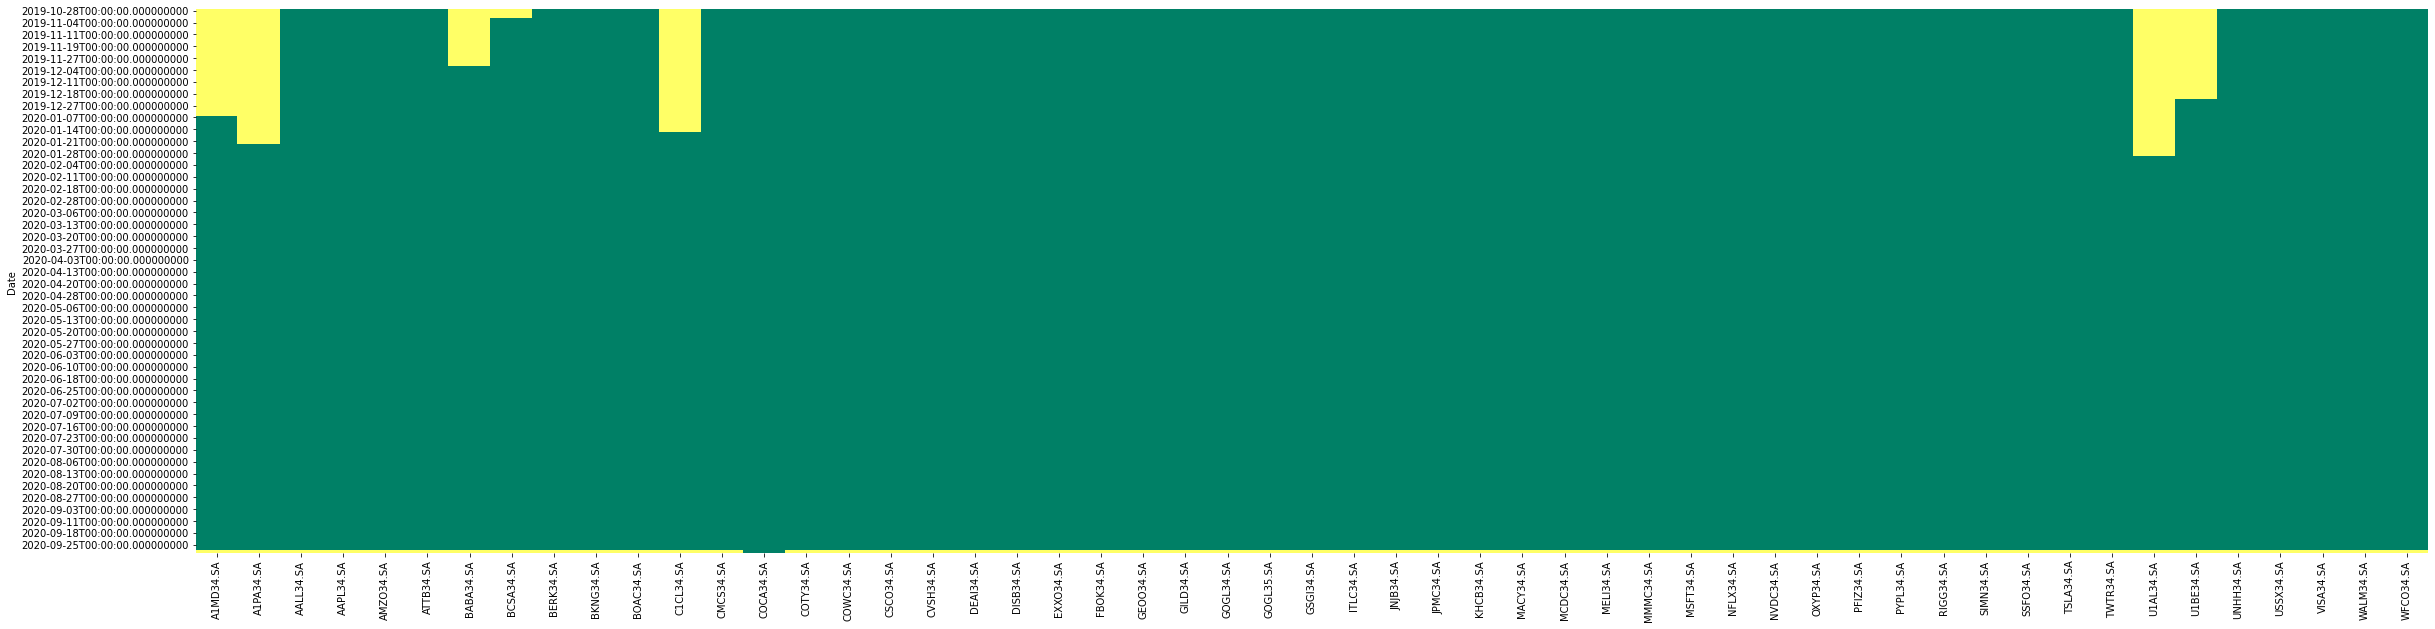

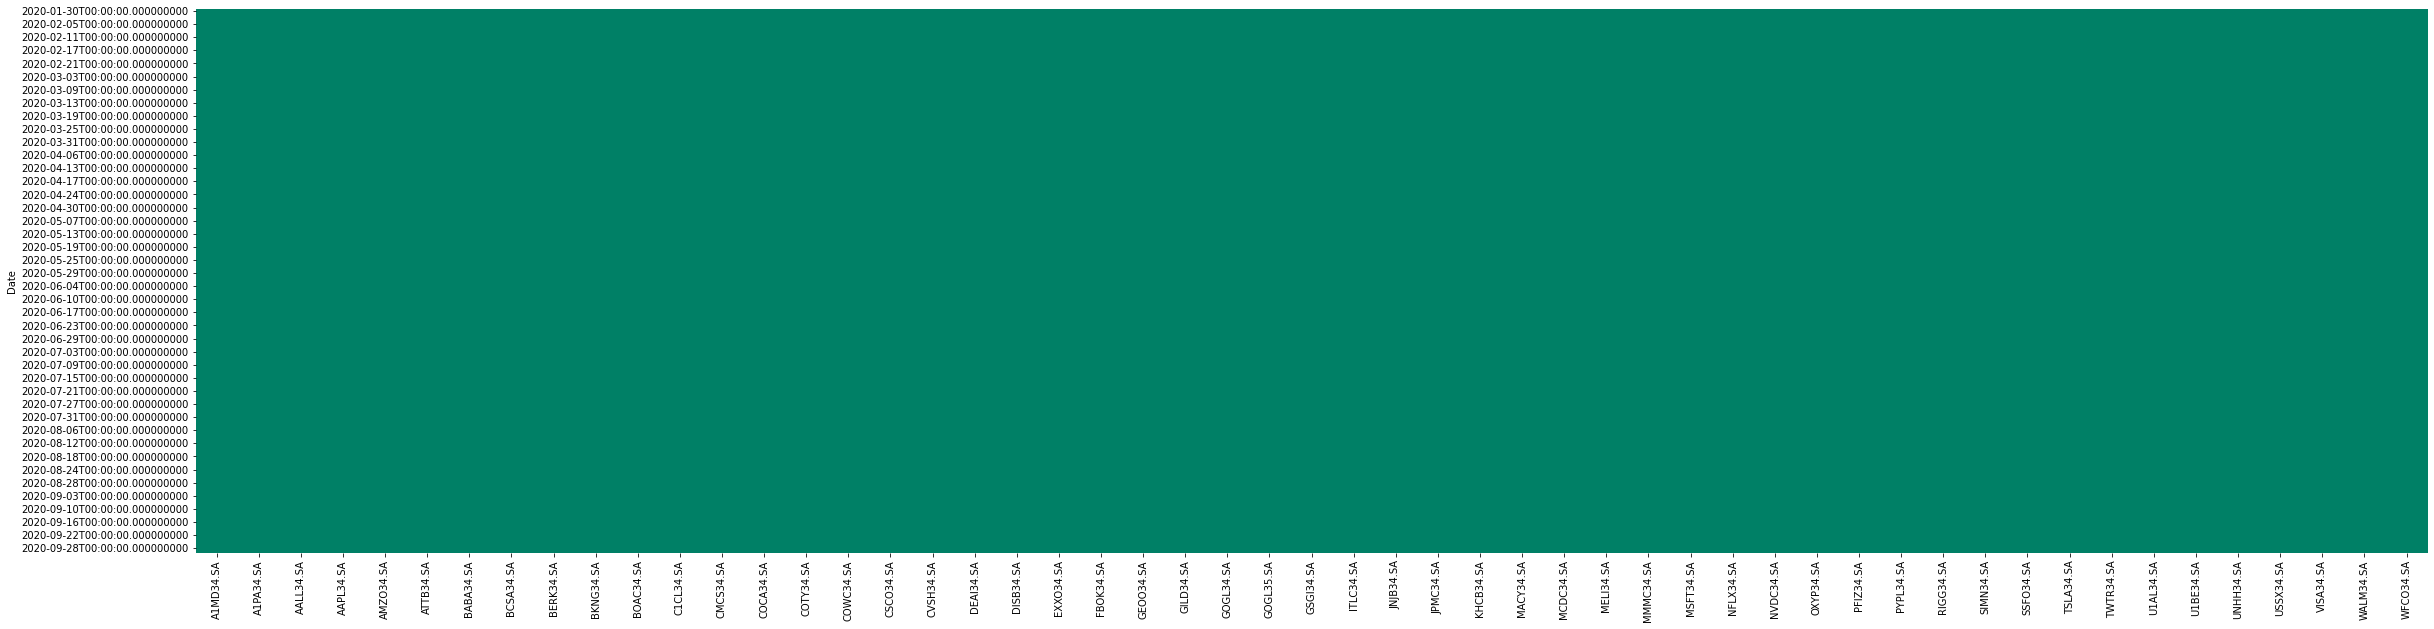

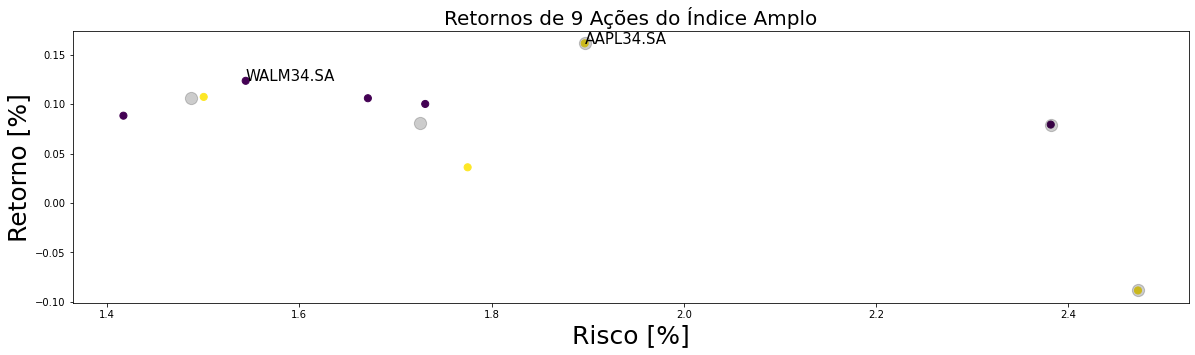

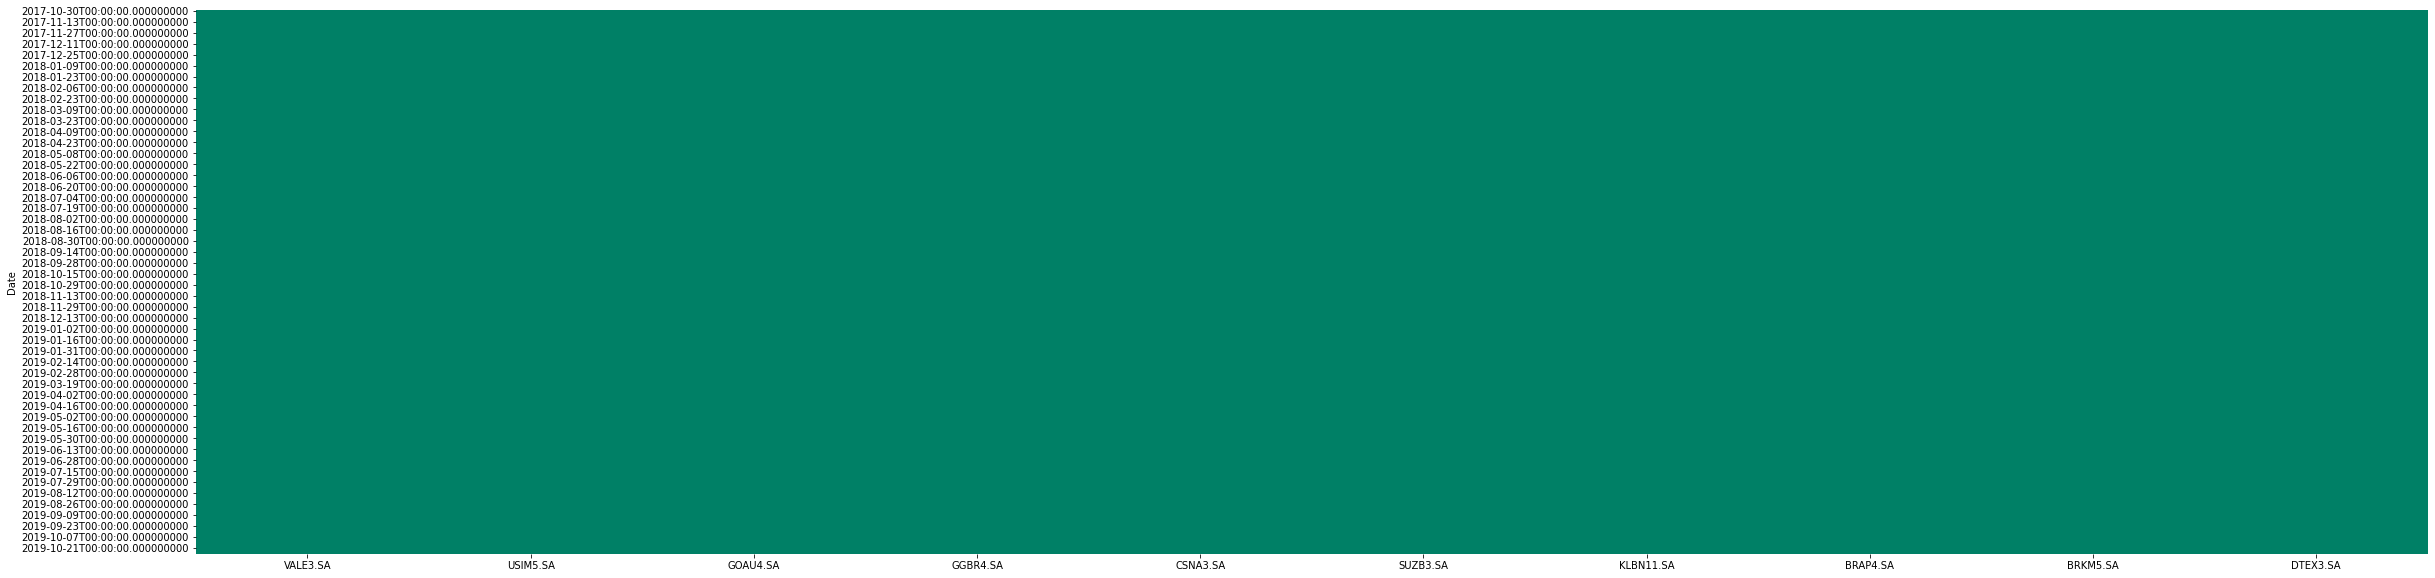

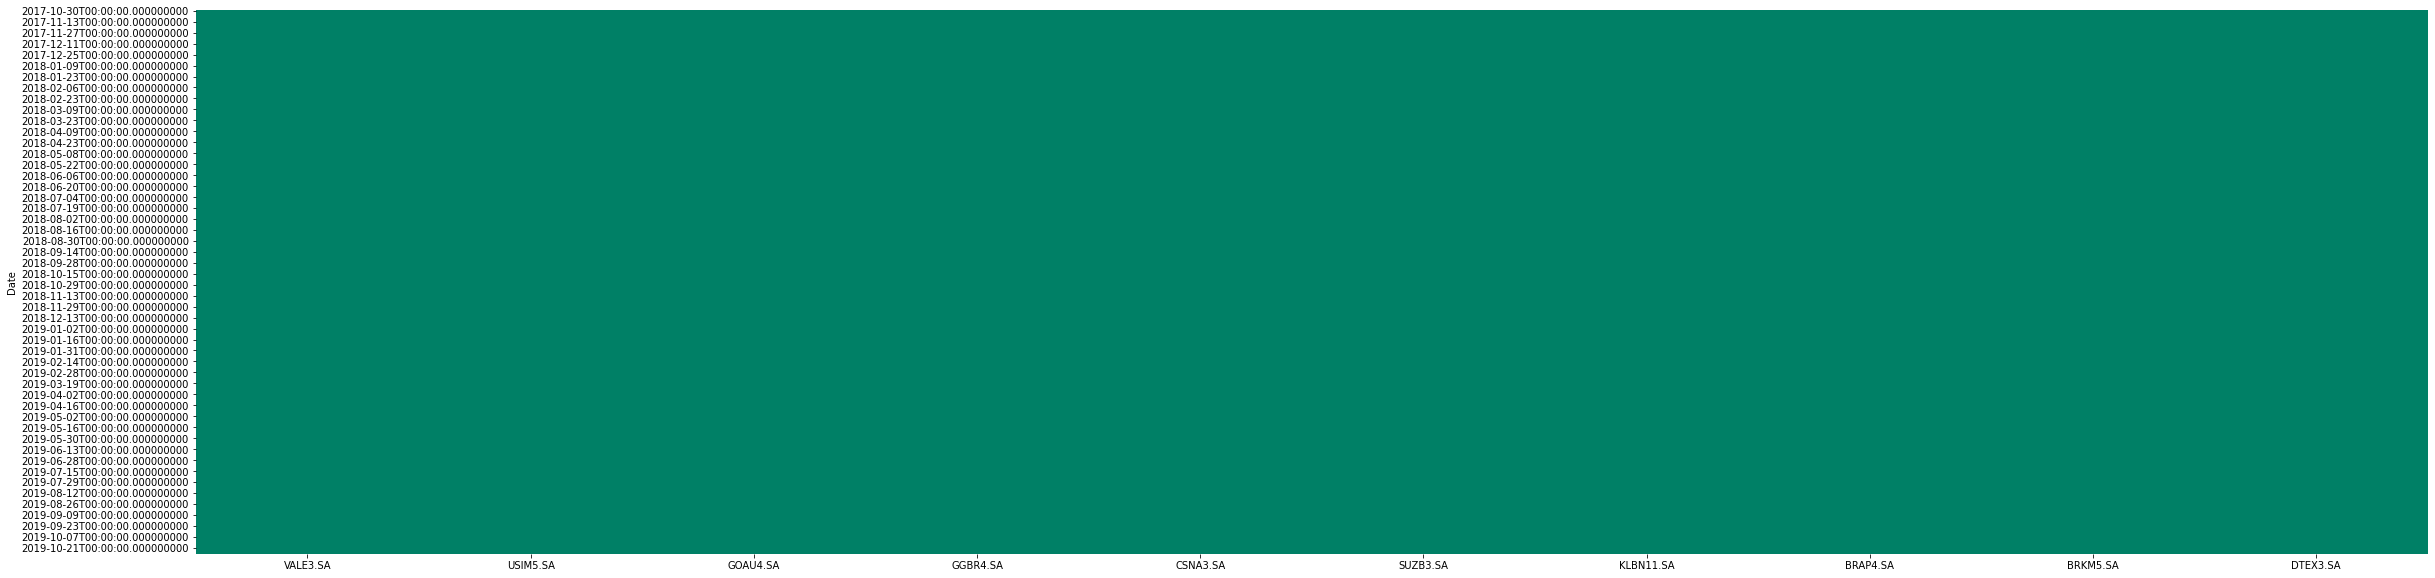

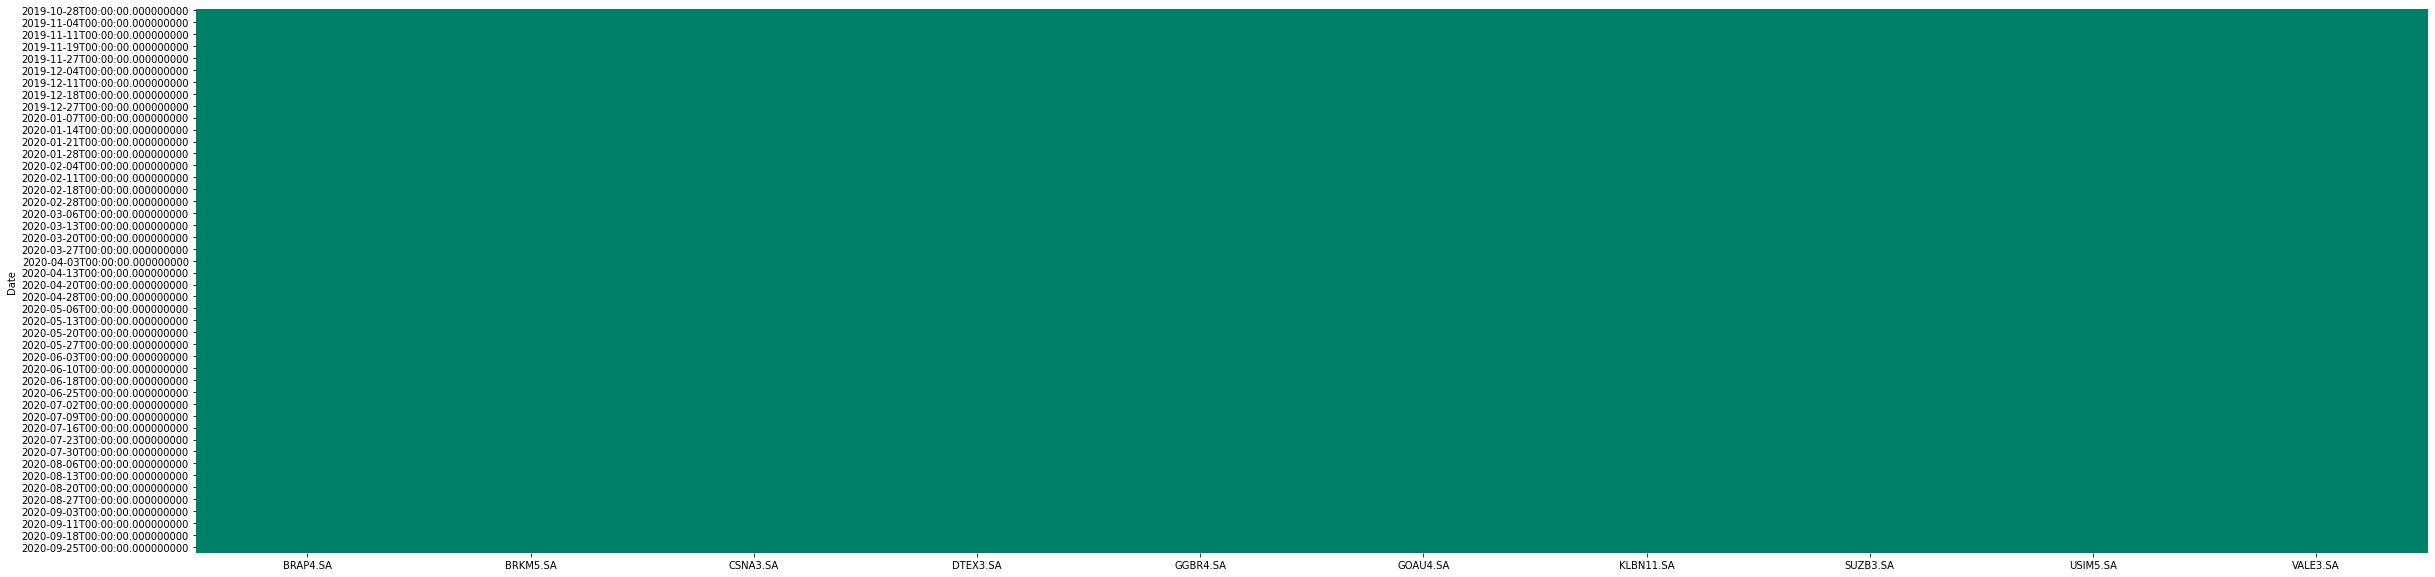

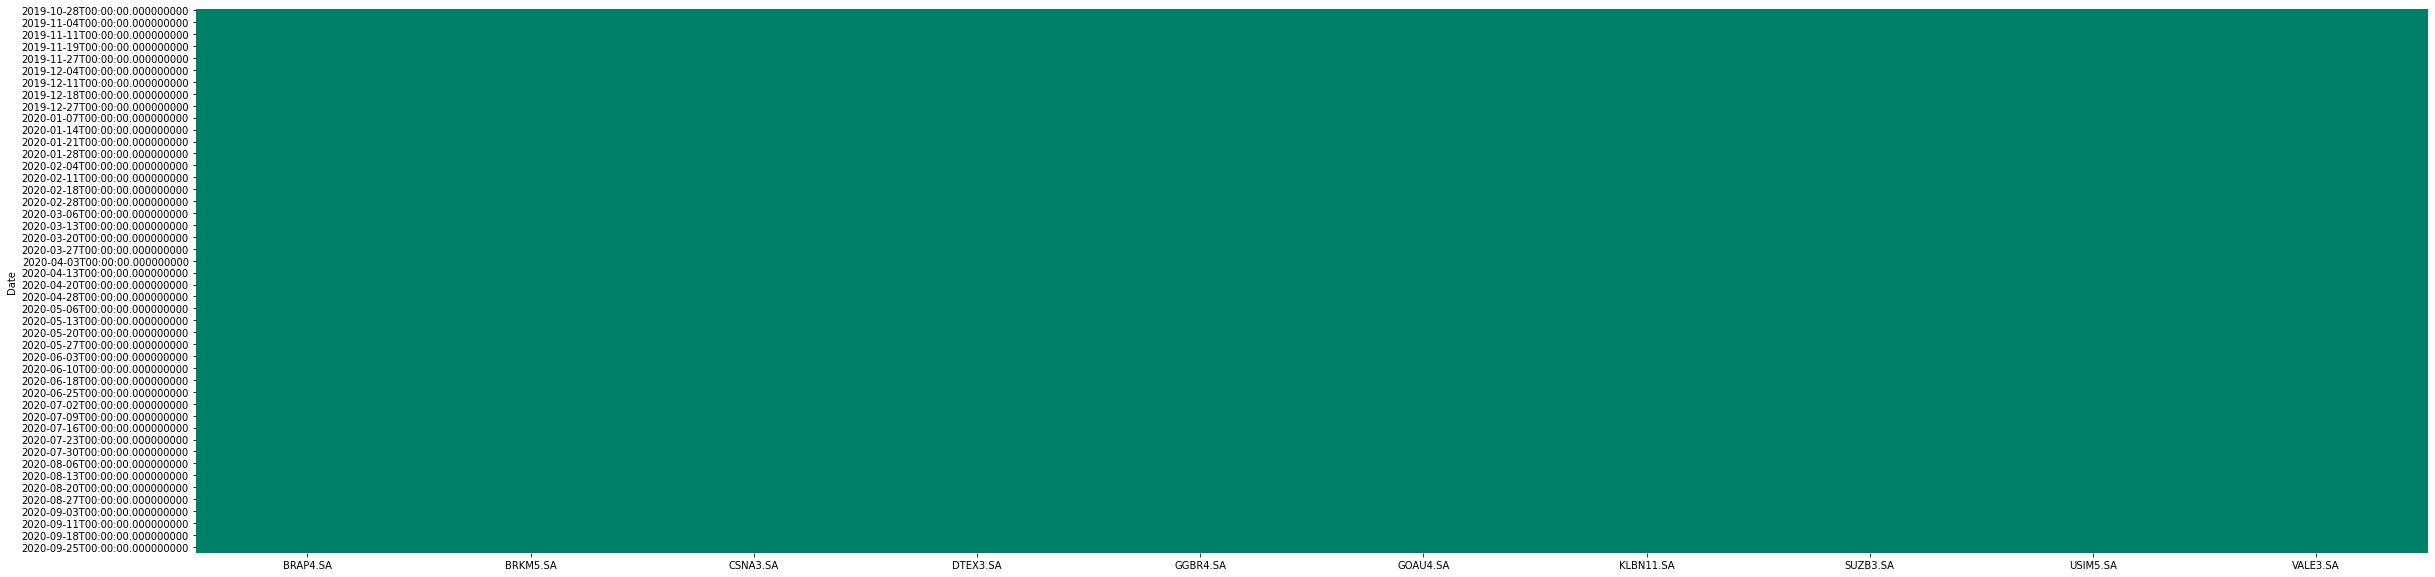

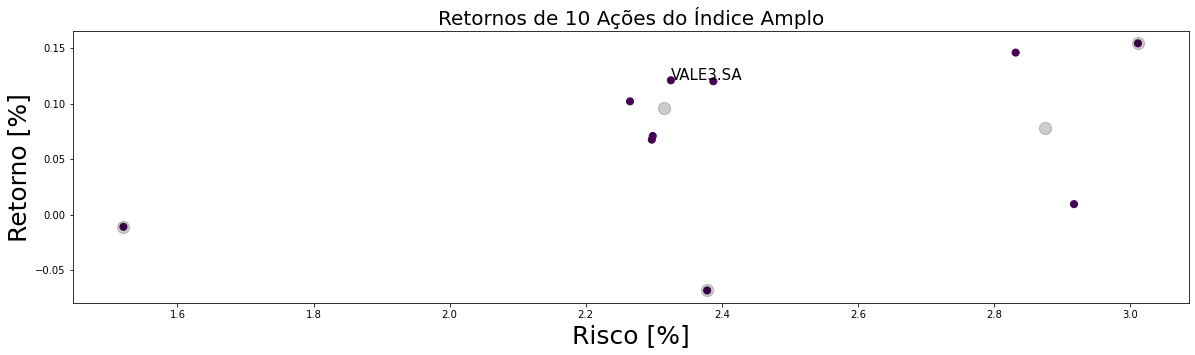

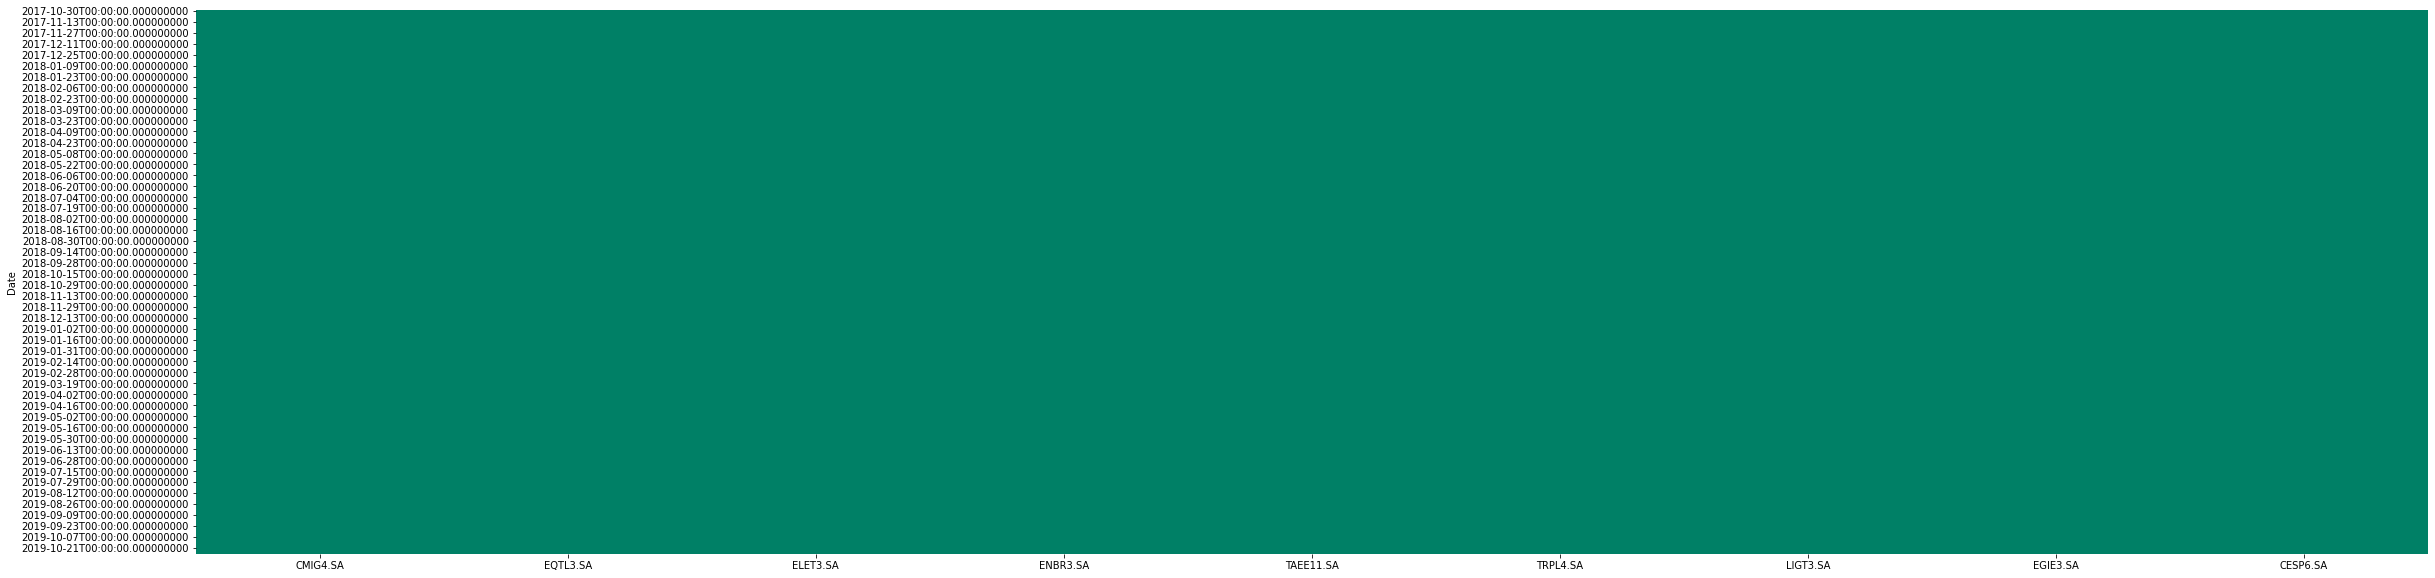

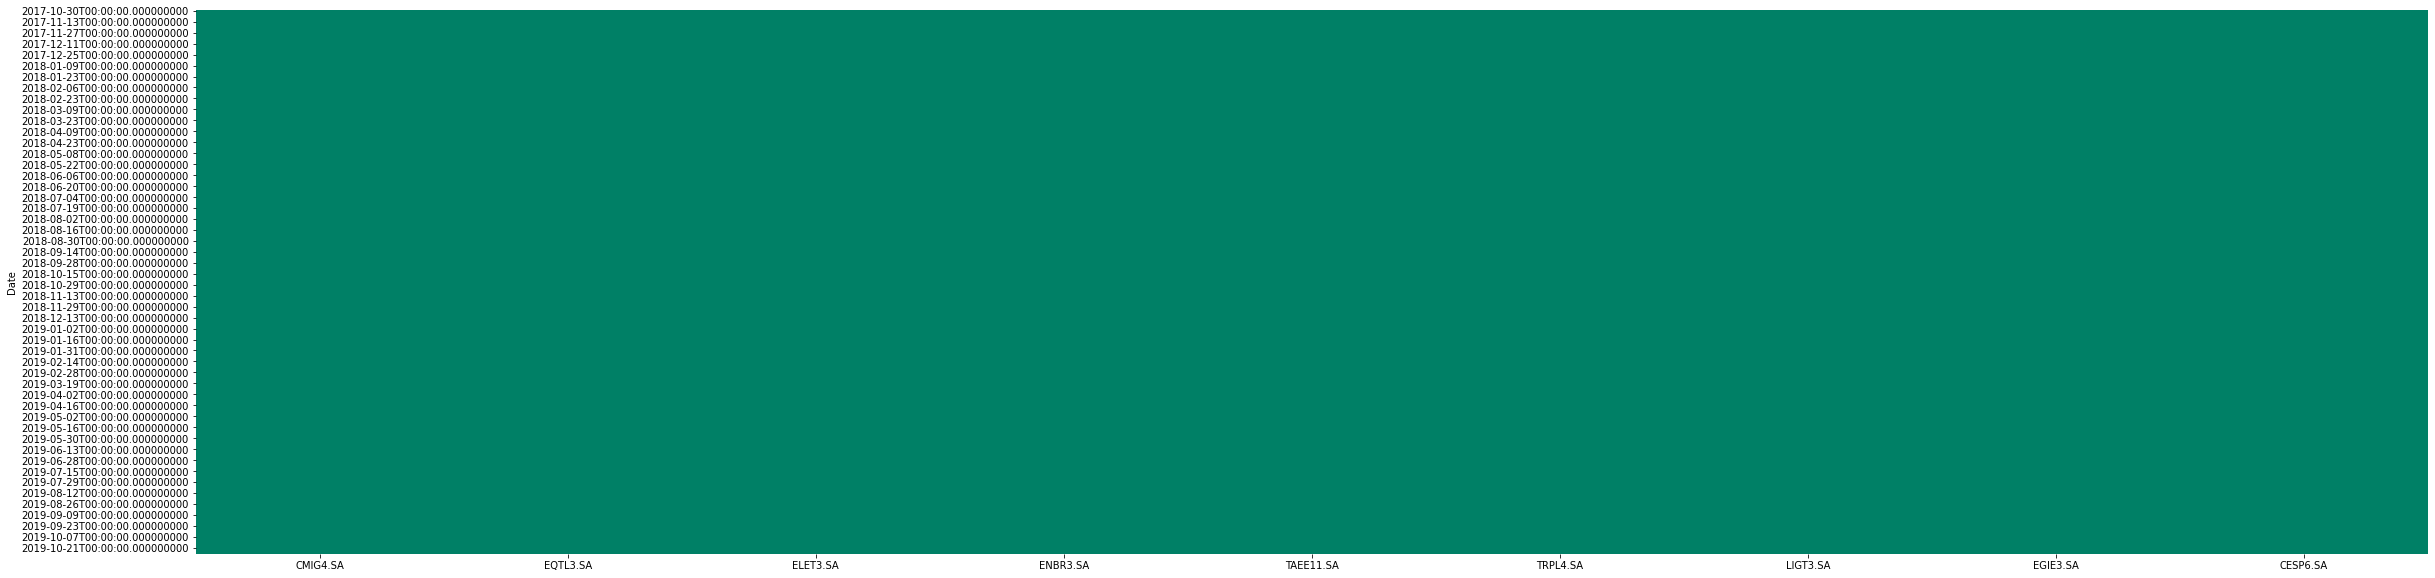

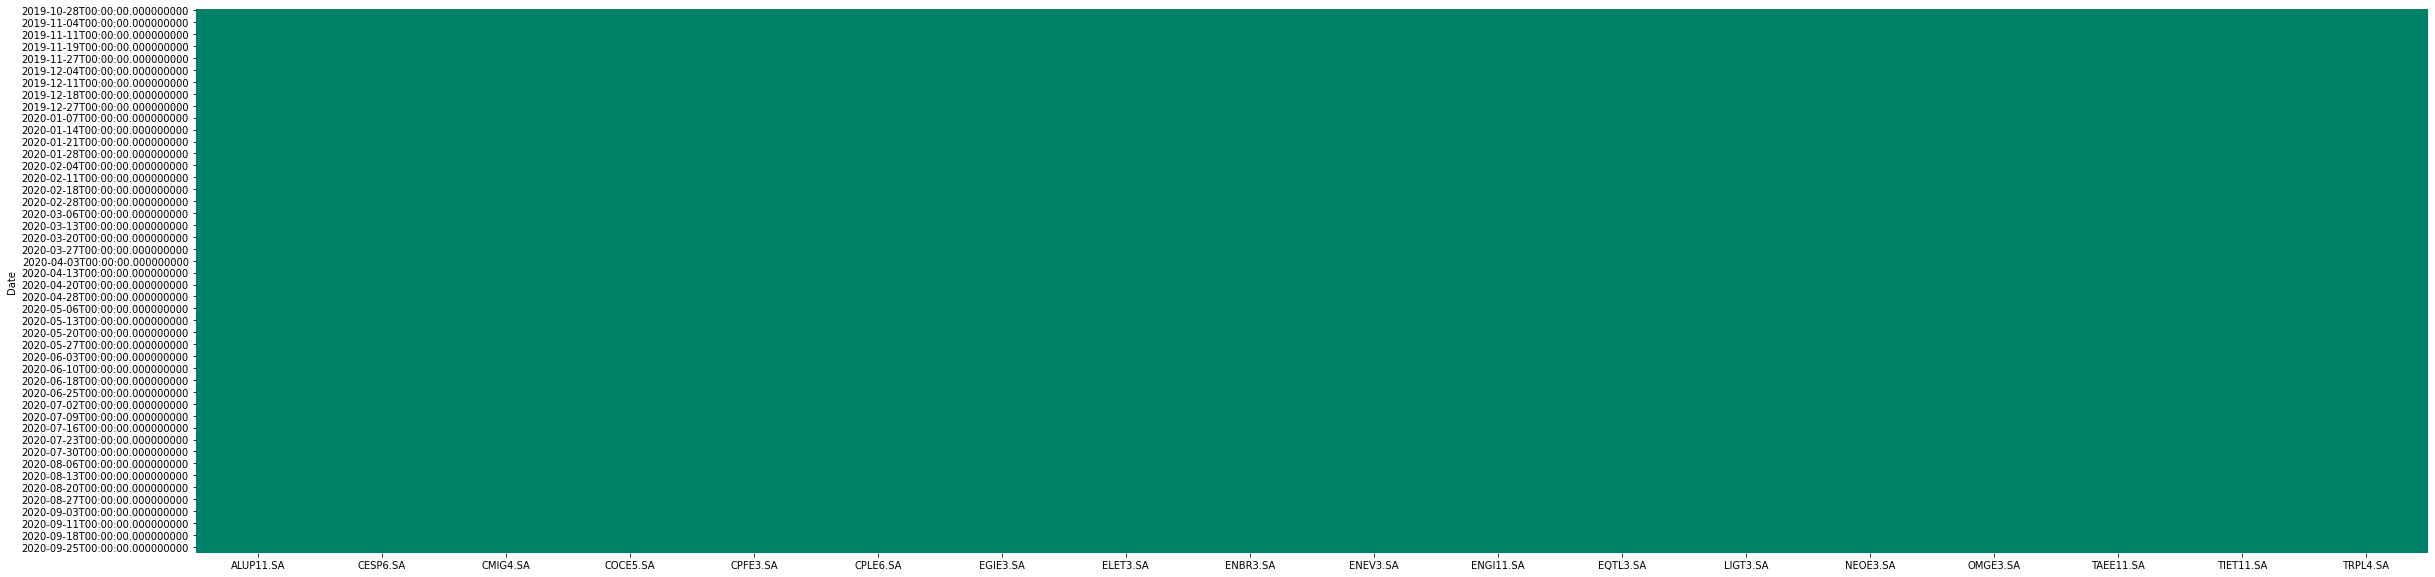

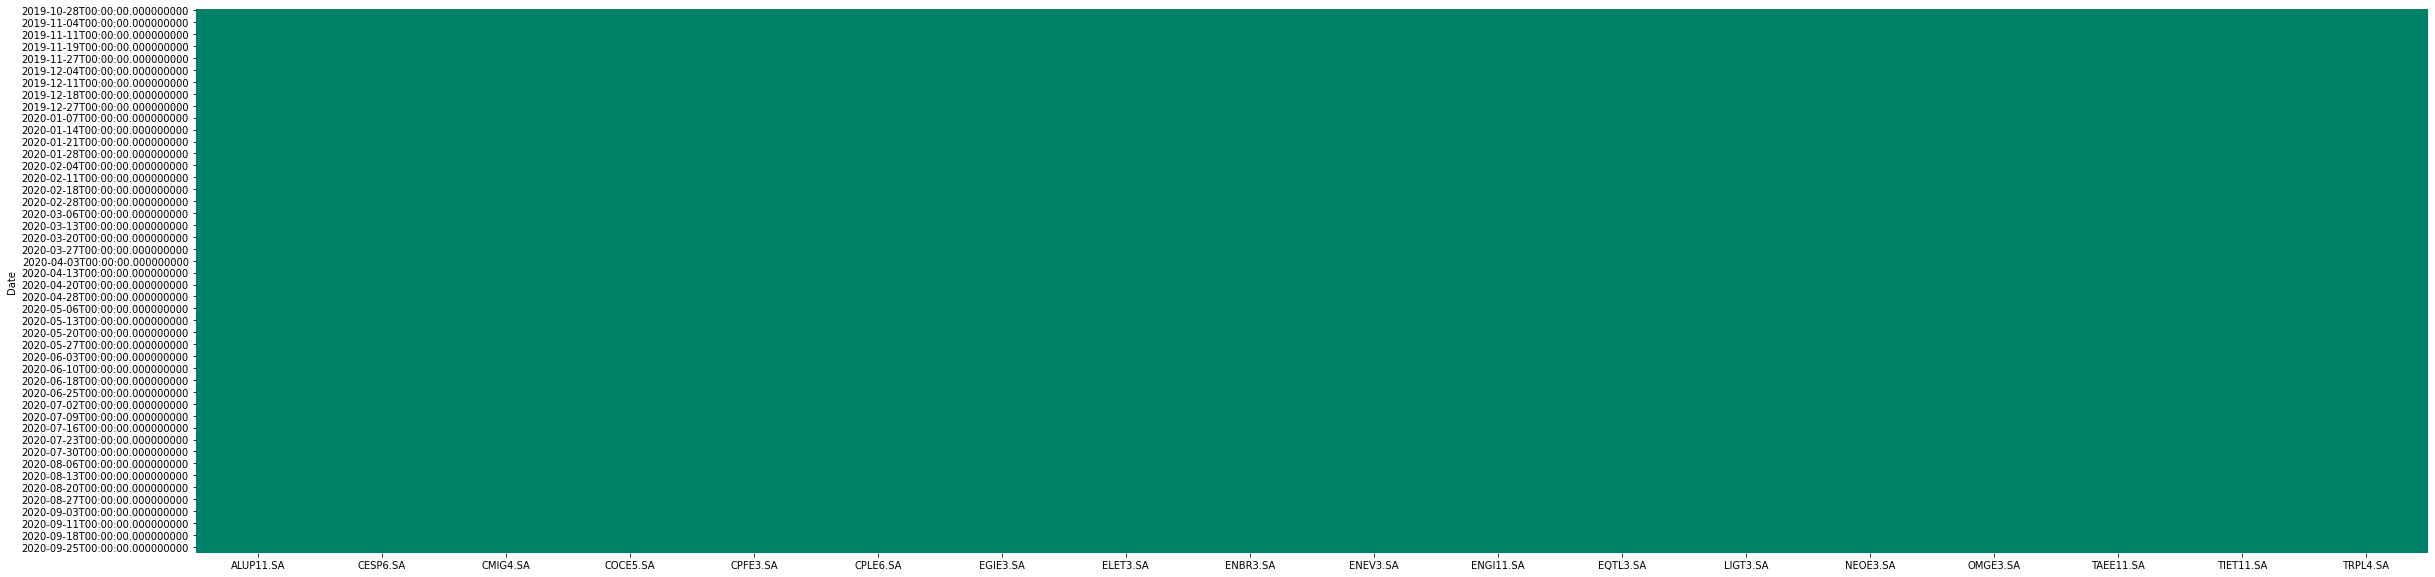

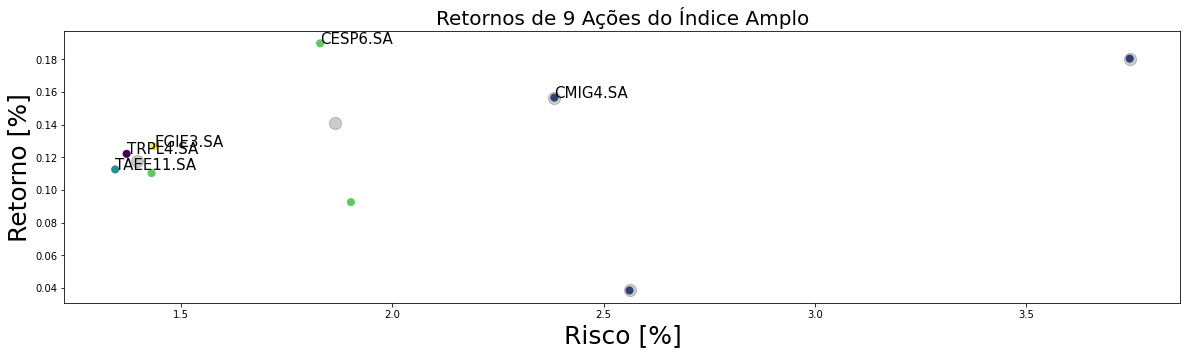

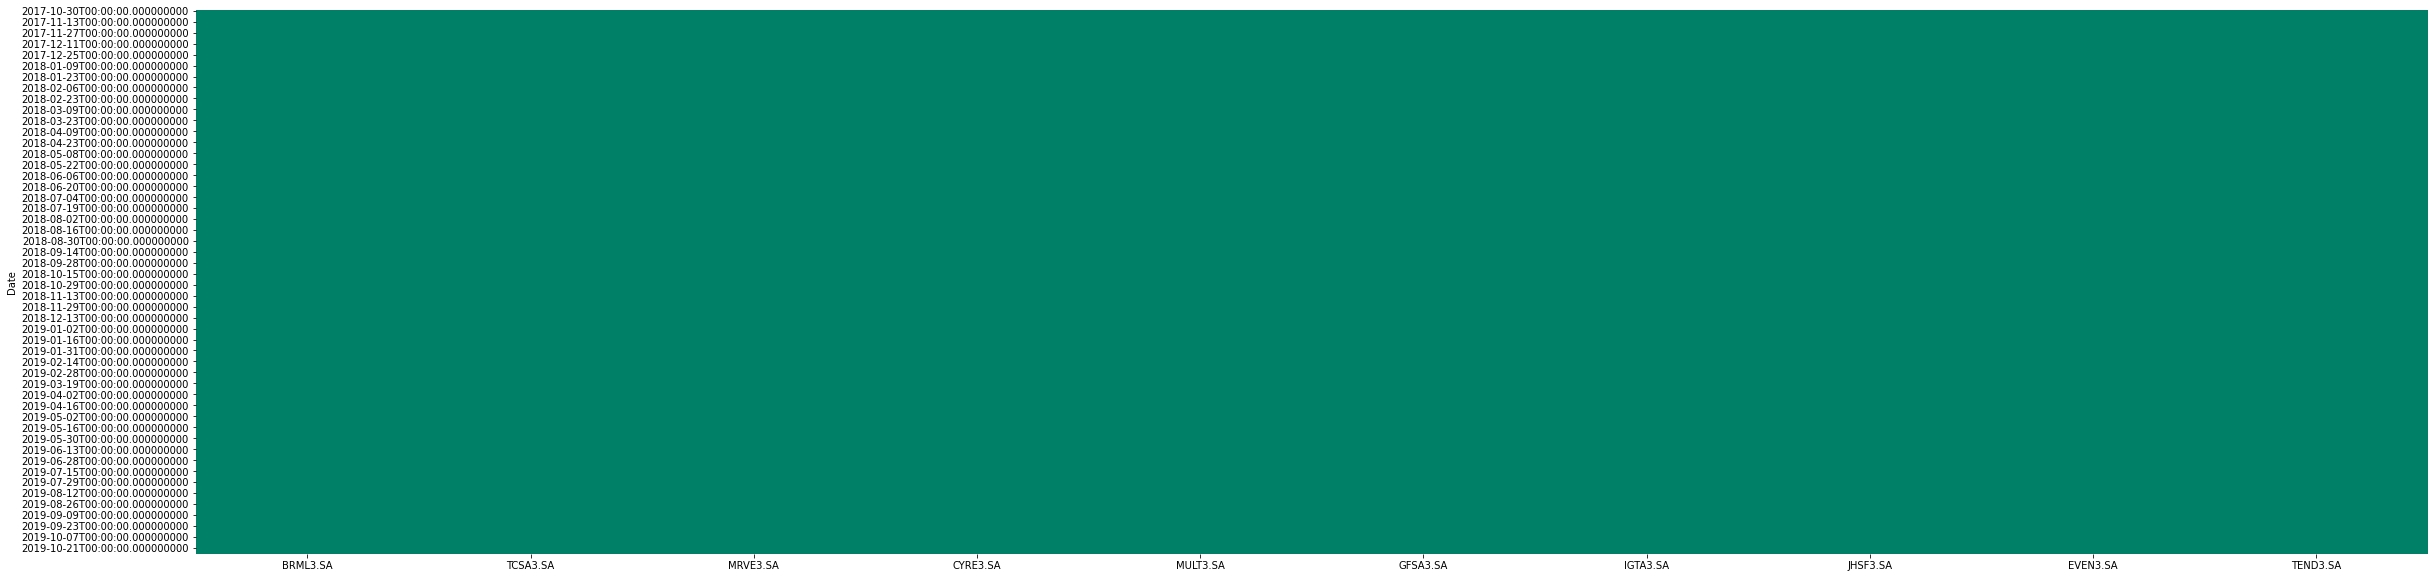

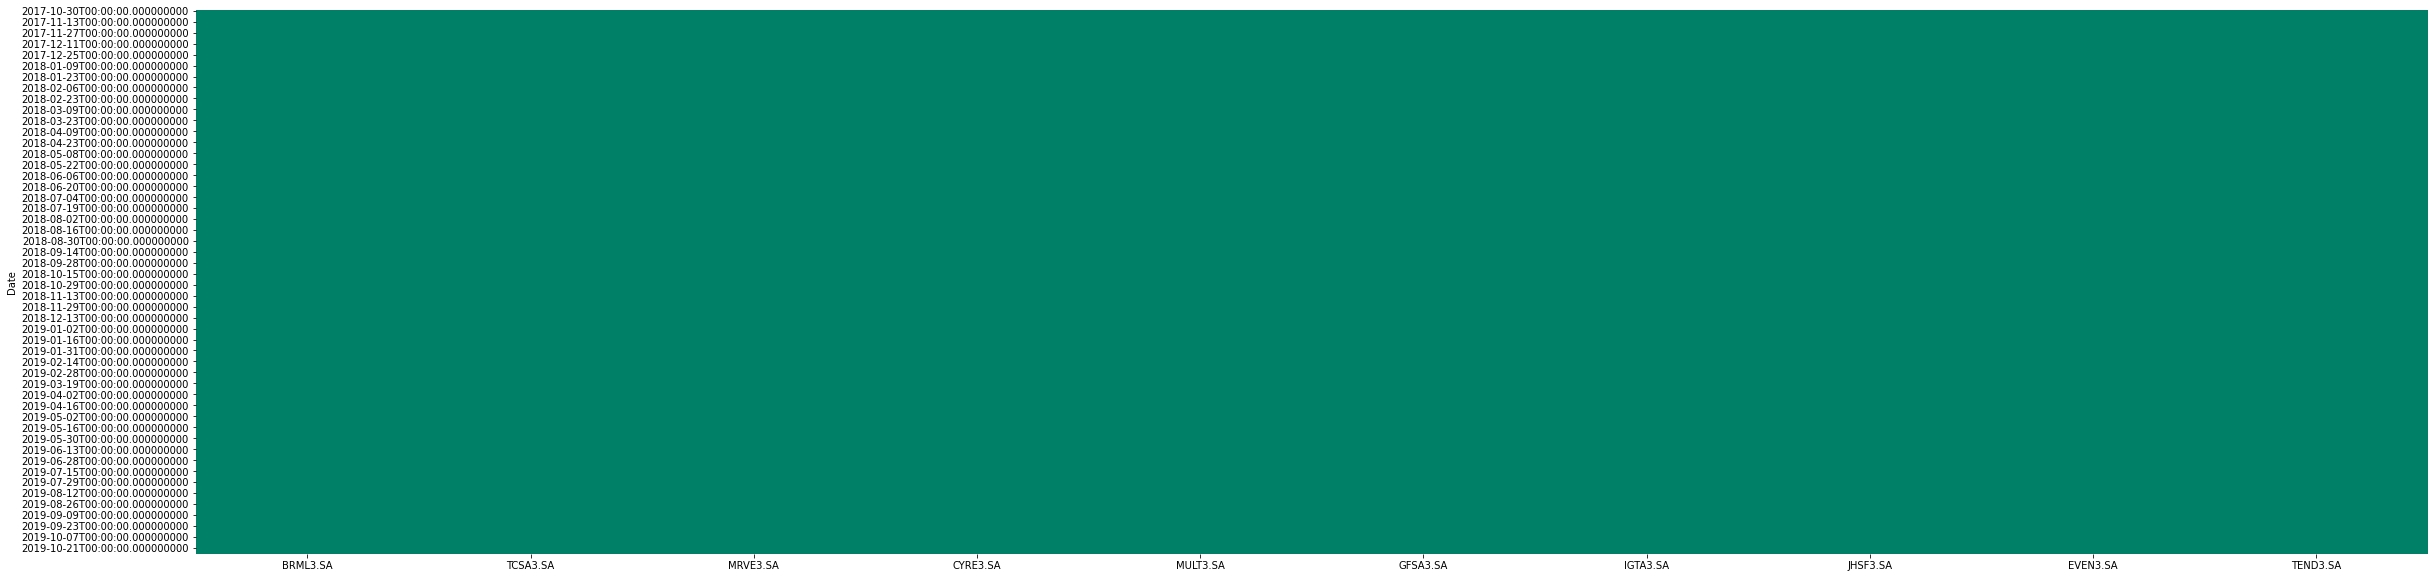

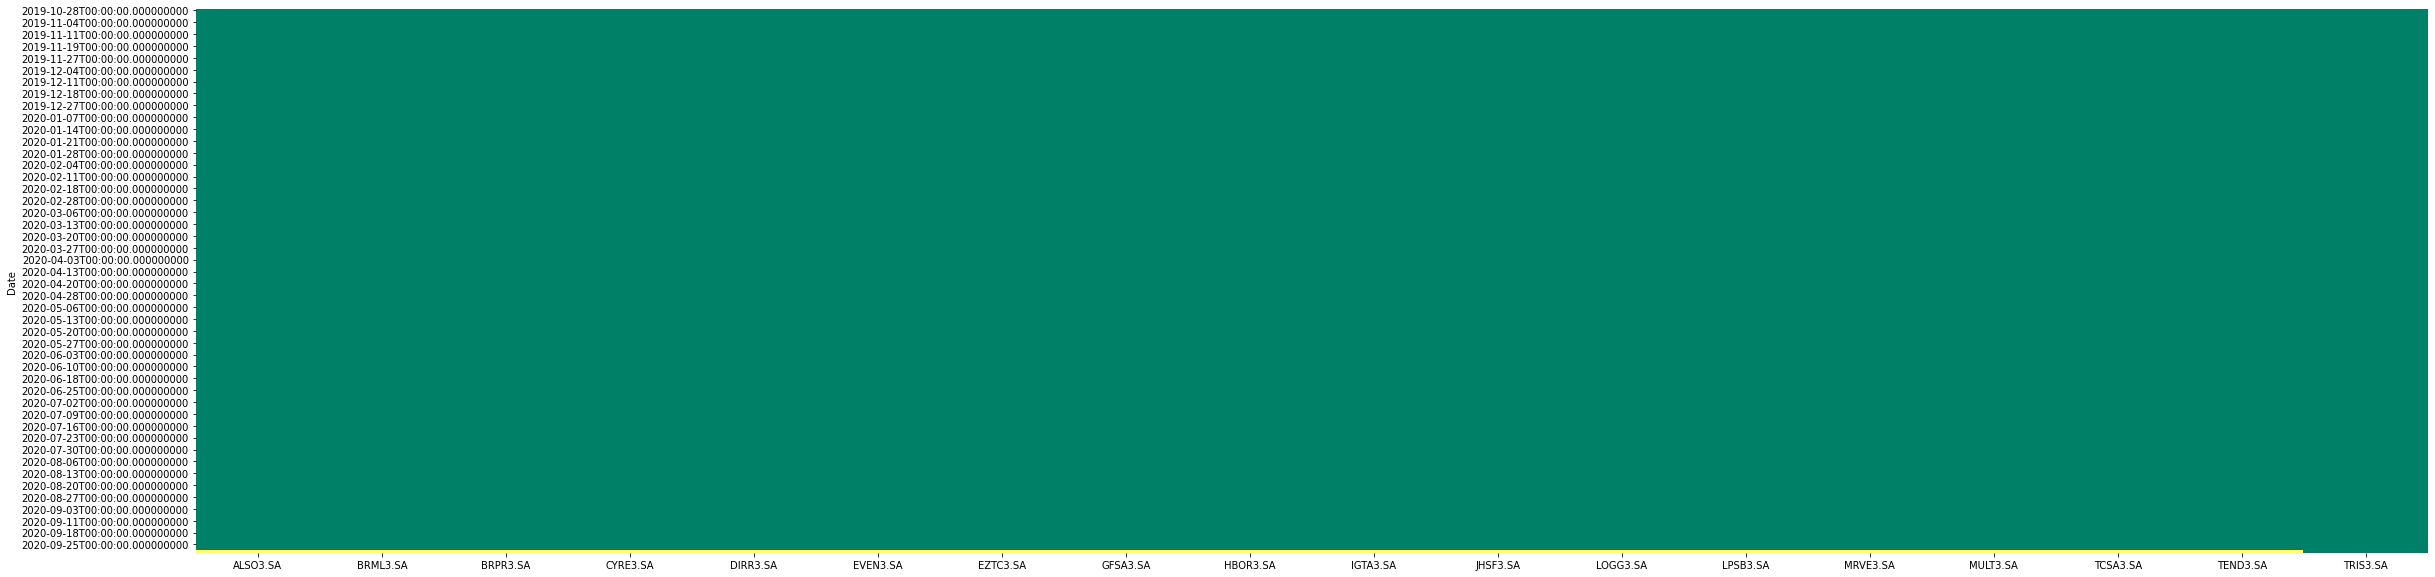

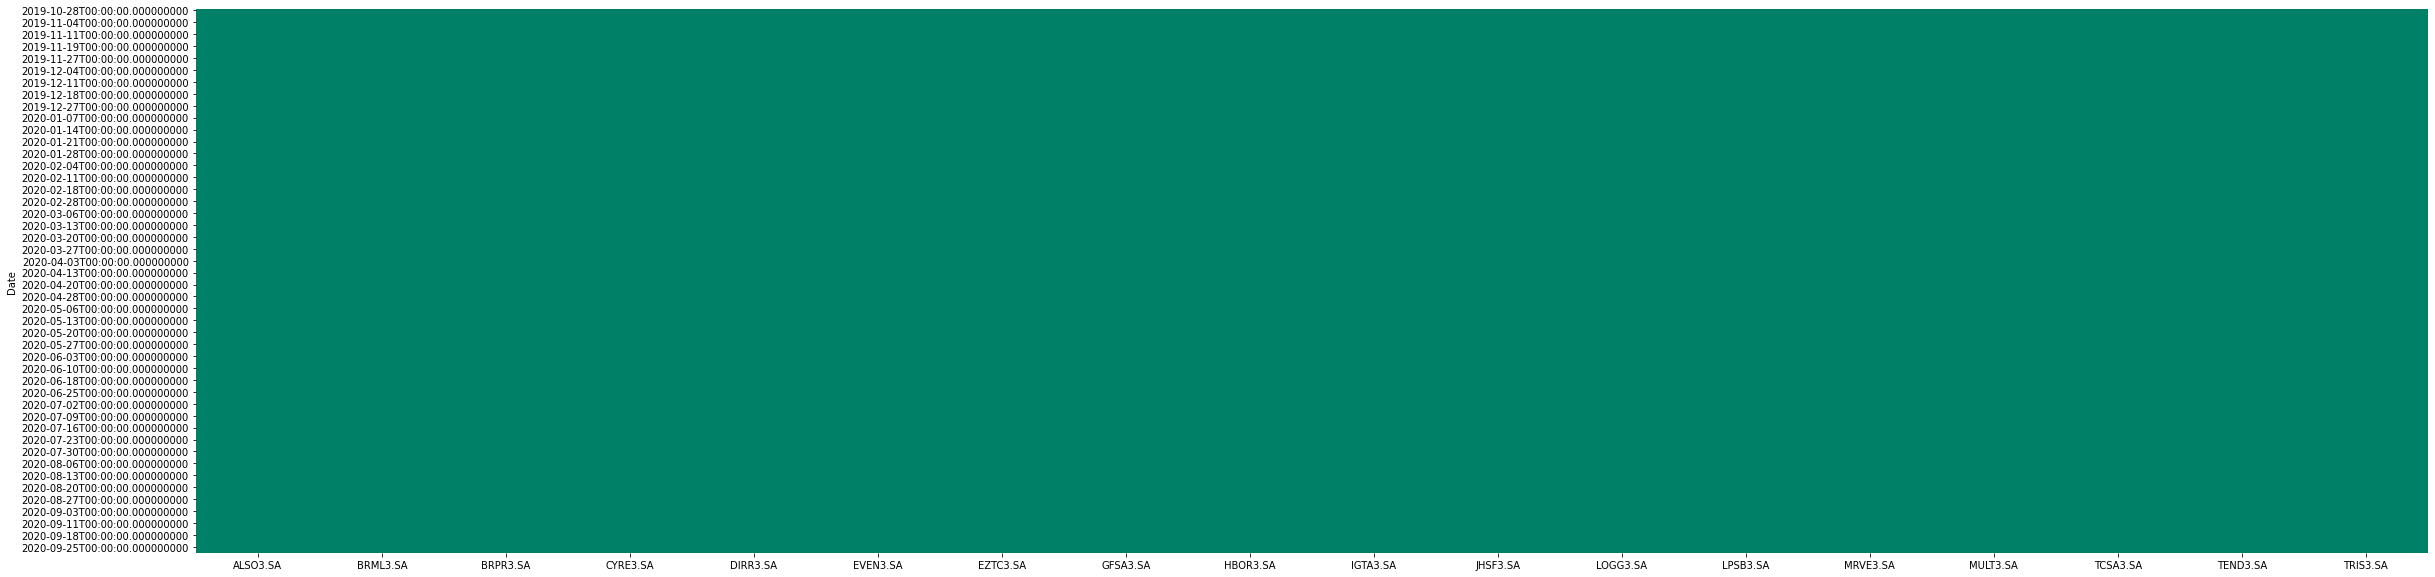

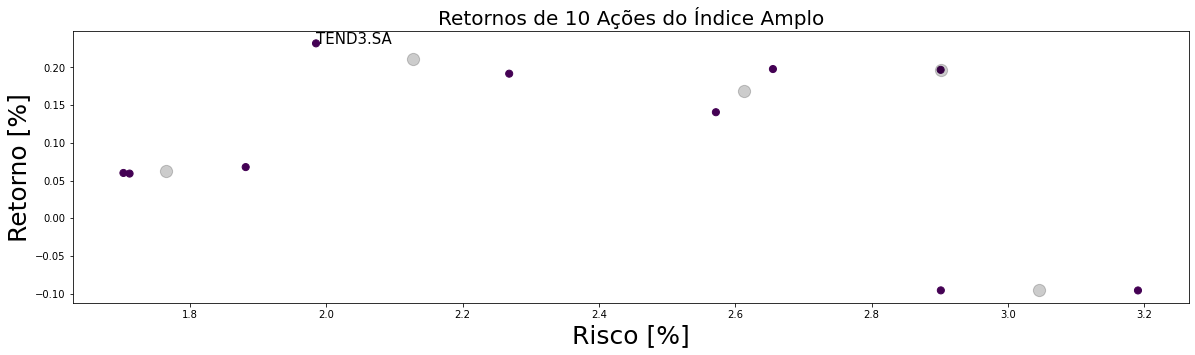

In [25]:
from tqdm import tqdm
bestes = []
for index in tqdm(indexes):
    best = fi.get_best_actives(train[index], test[index], 5, index)
    bestes.append(best)
bestes

In [26]:
bestes

[('IFNC', ('IRBR3.SA', -0.02957533417474176)),
 ('BDRX', ('AAPL34.SA', -0.11054961887482566)),
 ('IMAT', ('VALE3.SA', -0.10095069915817778)),
 ('IEE', ('CESP6.SA', -0.08517148093961788)),
 ('IMOB', ('TEND3.SA', -0.031196843874786415))]

In [60]:
data = {}
for a in bestes:
    data[a[1][0]] = []

In [61]:
data

{'IRBR3.SA': [],
 'AAPL34.SA': [],
 'VALE3.SA': [],
 'CESP6.SA': [],
 'TEND3.SA': []}

In [62]:
# for i in range(496):
#     data[bestes[0][1][0]].append(train[bestes[0][0]][bestes[0][1][0]].iloc[i])
#     data[bestes[1][1][0]].append(train[bestes[1][0]][bestes[1][1][0]].iloc[i])
#     data[bestes[2][1][0]].append(train[bestes[2][0]][bestes[2][1][0]].iloc[i])
#     data[bestes[3][1][0]].append(train[bestes[3][0]][bestes[3][1][0]].iloc[i])
#     data[bestes[4][1][0]].append(train[bestes[4][0]][bestes[4][1][0]].iloc[i])

for i in range(228):
    data[bestes[0][1][0]].append(test[bestes[0][0]][bestes[0][1][0]].iloc[i])
    data[bestes[1][1][0]].append(test[bestes[1][0]][bestes[1][1][0]].iloc[i])
    data[bestes[2][1][0]].append(test[bestes[2][0]][bestes[2][1][0]].iloc[i])
    data[bestes[3][1][0]].append(test[bestes[3][0]][bestes[3][1][0]].iloc[i])
    data[bestes[4][1][0]].append(test[bestes[4][0]][bestes[4][1][0]].iloc[i])


In [63]:
new_df = pd.DataFrame(data=data)

In [64]:
new_df.head()

,IRBR3.SA,AAPL34.SA,VALE3.SA,CESP6.SA,TEND3.SA
0,36.788086,24.153168,45.539200,27.463476,23.627542
1,35.988338,23.695833,45.492443,27.352213,23.952152
2,35.559914,23.585779,45.436337,27.815809,23.961987
3,35.978825,24.456427,44.136551,27.537651,23.224241
4,36.511982,24.745014,45.296070,27.482019,24.660387


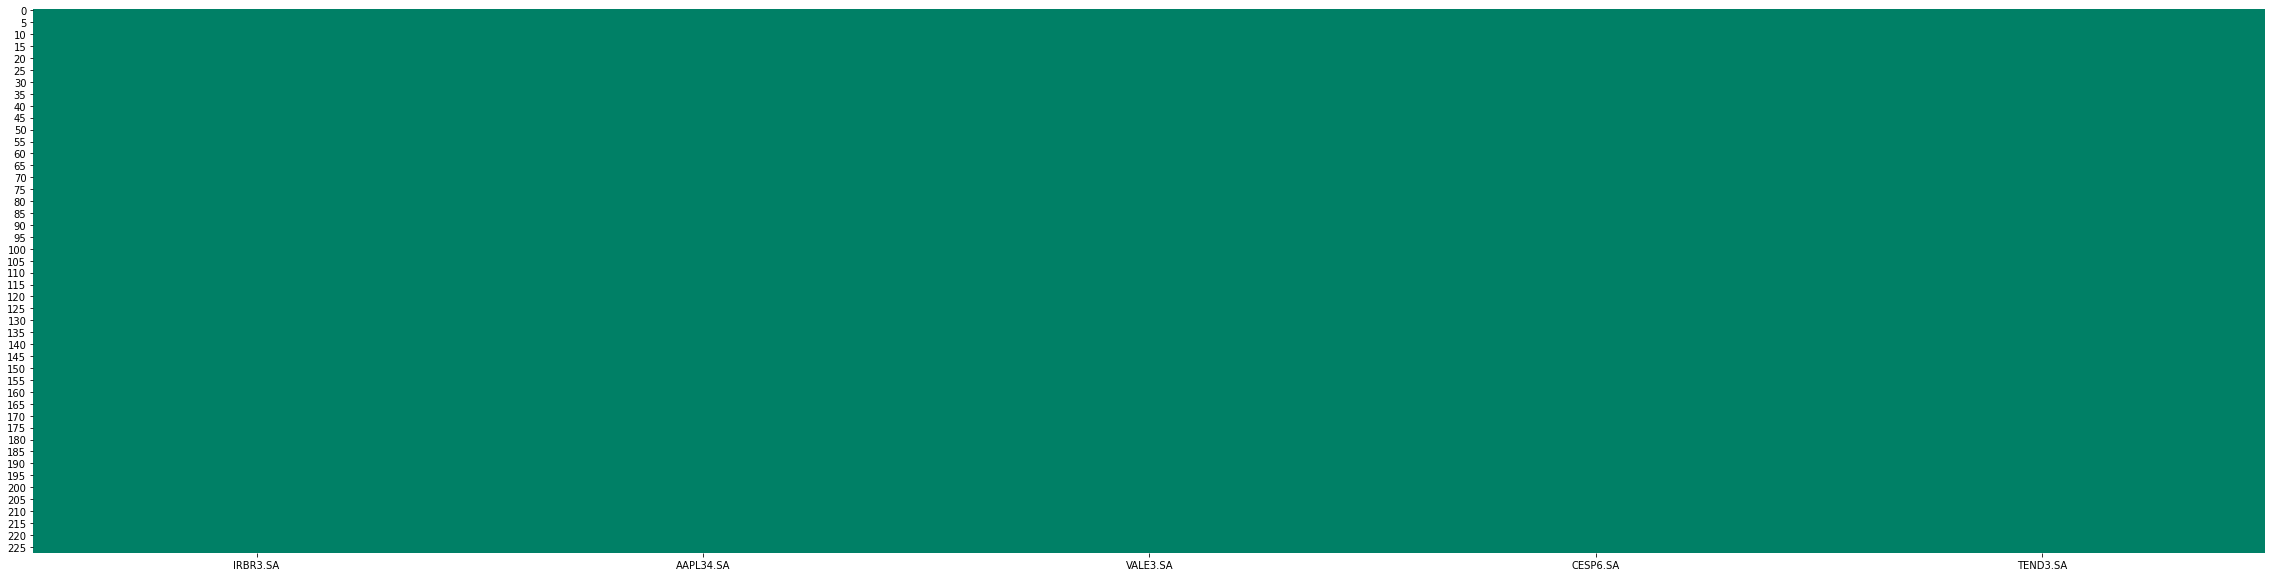

In [65]:
fi.plot_data_segmentation(new_df)
pass

In [66]:
ret=new_df.diff().dropna().copy()
ret=100*ret/new_df.iloc[0]

In [67]:
ret

,IRBR3.SA,AAPL34.SA,VALE3.SA,CESP6.SA,TEND3.SA
1,-2.173931,-1.893476,-0.102674,-0.405132,1.373862
2,-1.164575,-0.455650,-0.123205,1.688047,0.041622
3,1.138714,3.604693,-2.854213,-1.012829,-3.122395
4,1.449266,1.194823,2.546200,-0.202566,6.078270
5,0.750526,1.761835,2.833681,0.877783,3.455445
...,...,...,...,...,...
223,1.495050,-4.844078,2.832718,-0.254883,-1.515907
224,2.120251,-0.207009,-0.966198,1.347240,2.526511
225,0.244645,9.563953,1.295587,1.638543,-0.168442
226,0.163096,10.185011,-1.032081,-4.114559,-3.831861


In [68]:
import numpy as np
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret,1000)

In [69]:
[print("ACTIVE: {} PESO: {}\n".format(active, round(qm[i][0],2))) for i, active in enumerate(ret.columns)]
pass

ACTIVE: IRBR3.SA PESO: 0.9

ACTIVE: AAPL34.SA PESO: -0.41

ACTIVE: VALE3.SA PESO: 0.08

ACTIVE: CESP6.SA PESO: 0.66

ACTIVE: TEND3.SA PESO: -0.23



In [70]:
soma = 0
for each in range(len(ret.columns)):
    soma+=qm[each][0]
soma

1.0

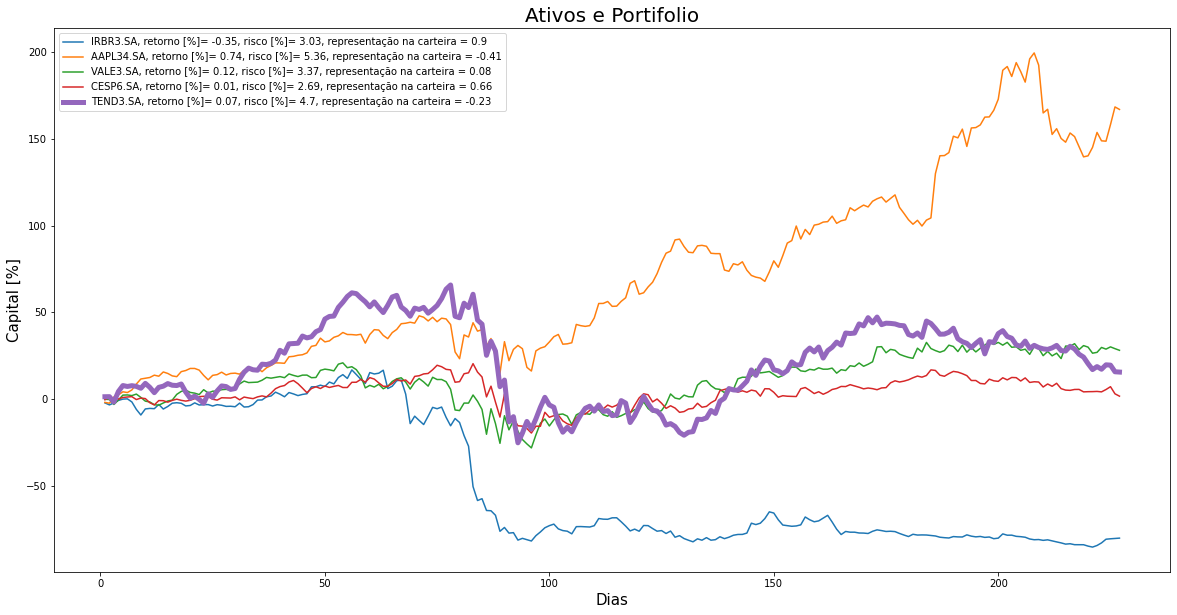

In [71]:
pesos=[qm[i][0] for i in range(len(qm))]+[1]
plt.figure(figsize=(20, 10))

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        plt.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    if i==max(range(len(ret.columns))):
        plt.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
plt.legend(loc='upper left')
plt.xlabel("Dias",fontsize=15)
plt.ylabel('Capital [%]',fontsize=15)
plt.title("Ativos e Portifolio",fontsize=20)
pass

In [72]:
ai = AIFinancial(new_df, new_df)

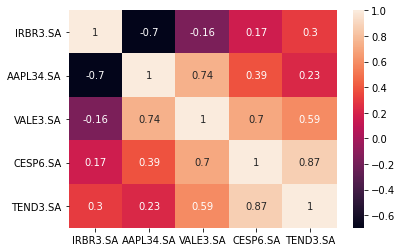

In [73]:
ai.heatmap_train()